In [1]:
import pandas as pd

# Replace 'your_file.tsv' with the actual path to your TSV file
file_path = 'scanpaths/reader0_b0_scanpath.tsv'

# Read the TSV file into a DataFrame
df = pd.read_csv(file_path, delimiter='\t')

In [2]:
df.head()

,fixation_index,text_domain,trial,acc_bq_1,acc_bq_2,acc_bq_3,acc_tq_1,acc_tq_2,acc_tq_3,fixation_duration,...,reader_id,text_id,fixation_position_x,fixation_position_y,word_index_in_text,sent_index_in_text,char_index_in_text,word,character,text_id_numeric
0,1,bio,2,0,0,1,1,1,0,281,...,0,b0,140.2,62.5,2,1,4,das,a,0
1,2,bio,2,0,0,1,1,1,0,283,...,0,b0,263.7,63.4,3,1,12,Vorhandensein,d,0
2,3,bio,2,0,0,1,1,1,0,394,...,0,b0,440.8,74.4,5,1,22,Polymerasekettenreaktion-Produkte,P,0
3,4,bio,2,0,0,1,1,1,0,254,...,0,b0,515.3,64.6,5,1,28,Polymerasekettenreaktion-Produkte,r,0
4,5,bio,2,0,0,1,1,1,0,340,...,0,b0,486.0,67.6,5,1,26,Polymerasekettenreaktion-Produkte,m,0


In [11]:
df.iloc[1]

fixation_index                           2
text_domain                            bio
trial                                    3
acc_bq_1                                 0
acc_bq_2                                 0
acc_bq_3                                 1
acc_tq_1                                 0
acc_tq_2                                 1
acc_tq_3                                 0
fixation_duration                      175
next_saccade_duration                   95
previous_saccade_duration             29.0
version                                 99
line                                     1
roi                                     10
char_index_in_line                      10
original_fixation_index                  2
is_fixation_adjusted                 False
reader_id                               99
text_id                                 b0
fixation_position_x                  237.2
fixation_position_y                   58.9
word_index_in_text                       3
sent_index_

In [3]:
df.columns

Index(['fixation_index', 'text_domain', 'trial', 'acc_bq_1', 'acc_bq_2',
       'acc_bq_3', 'acc_tq_1', 'acc_tq_2', 'acc_tq_3', 'fixation_duration',
       'next_saccade_duration', 'previous_saccade_duration', 'version', 'line',
       'roi', 'char_index_in_line', 'original_fixation_index',
       'is_fixation_adjusted', 'reader_id', 'text_id', 'fixation_position_x',
       'fixation_position_y', 'word_index_in_text', 'sent_index_in_text',
       'char_index_in_text', 'word', 'character', 'text_id_numeric'],
      dtype='object')

In [8]:
df.shape

(427, 28)

### Clustering Users Within Each Document:

In [41]:
import pandas as pd
import glob

# Replace 'your_folder_path' with the actual path to your folder
folder_path = 'scanpaths'

# Find all TSV files with naming convention 'reader*_b0_scanpath.tsv' in the folder
tsv_files = glob.glob(f"{folder_path}/reader*_b0_scanpath.tsv")

# Create an empty DataFrame to store the merged data
merged_df = pd.DataFrame()

# Iterate through each TSV file, read it, and merge it into the main DataFrame
for tsv_file in tsv_files:
    df = pd.read_csv(tsv_file, delimiter='\t')
    merged_df = pd.concat([merged_df, df], ignore_index=True)

In [42]:
merged_df.shape

(27385, 28)

In [43]:
merged_df.head()

,fixation_index,text_domain,trial,acc_bq_1,acc_bq_2,acc_bq_3,acc_tq_1,acc_tq_2,acc_tq_3,fixation_duration,...,reader_id,text_id,fixation_position_x,fixation_position_y,word_index_in_text,sent_index_in_text,char_index_in_text,word,character,text_id_numeric
0,1,bio,2,0.0,0.0,1.0,1.0,1.0,0.0,281,...,0,b0,140.2,62.5,2,1,4,das,a,0
1,2,bio,2,0.0,0.0,1.0,1.0,1.0,0.0,283,...,0,b0,263.7,63.4,3,1,12,Vorhandensein,d,0
2,3,bio,2,0.0,0.0,1.0,1.0,1.0,0.0,394,...,0,b0,440.8,74.4,5,1,22,Polymerasekettenreaktion-Produkte,P,0
3,4,bio,2,0.0,0.0,1.0,1.0,1.0,0.0,254,...,0,b0,515.3,64.6,5,1,28,Polymerasekettenreaktion-Produkte,r,0
4,5,bio,2,0.0,0.0,1.0,1.0,1.0,0.0,340,...,0,b0,486.0,67.6,5,1,26,Polymerasekettenreaktion-Produkte,m,0


In [44]:
selected_columns = ['fixation_duration', 'fixation_position_x', 'fixation_position_y', 'reader_id', 'next_saccade_duration', 'previous_saccade_duration', 'fixation_index', 'word_index_in_text', 'sent_index_in_text','char_index_in_text', 'word', 'character']

In [45]:
# Select only the chosen columns from the DataFrame
selected_df = merged_df[selected_columns]

In [46]:
selected_df.shape

(27385, 12)

In [47]:
selected_df.head()

,fixation_duration,fixation_position_x,fixation_position_y,reader_id,next_saccade_duration,previous_saccade_duration,fixation_index,word_index_in_text,sent_index_in_text,char_index_in_text,word,character
0,281,140.2,62.5,0,25.0,21.0,1,2,1,4,das,a
1,283,263.7,63.4,0,36.0,25.0,2,3,1,12,Vorhandensein,d
2,394,440.8,74.4,0,20.0,36.0,3,5,1,22,Polymerasekettenreaktion-Produkte,P
3,254,515.3,64.6,0,11.0,20.0,4,5,1,28,Polymerasekettenreaktion-Produkte,r
4,340,486.0,67.6,0,18.0,11.0,5,5,1,26,Polymerasekettenreaktion-Produkte,m


In [48]:
selected_df["reader_id"].value_counts()

19    821
96    752
20    607
95    603
32    602
     ... 
75    166
36    156
66    156
71    142
85    141
Name: reader_id, Length: 75, dtype: int64

In [49]:
selected_df.describe()

,fixation_duration,fixation_position_x,fixation_position_y,reader_id,next_saccade_duration,previous_saccade_duration,fixation_index,word_index_in_text,sent_index_in_text,char_index_in_text
count,27385.000000,27385.000000,27385.000000,27385.000000,27383.000000,27334.000000,27385.000000,27385.000000,27385.000000,27385.000000
mean,223.112434,765.831813,433.193518,50.237940,39.683125,39.218007,211.797663,66.914880,5.217564,466.762717
std,108.631642,444.230538,250.996466,34.501528,45.675443,44.506484,149.705351,43.663293,3.143188,284.886828
min,9.000000,80.600000,21.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,162.000000,373.300000,220.700000,18.000000,23.000000,23.000000,92.000000,29.000000,2.000000,212.000000
50%,203.000000,734.600000,405.800000,40.000000,28.000000,28.000000,186.000000,61.000000,5.000000,457.000000
75%,262.000000,1140.500000,640.900000,83.000000,39.000000,38.000000,307.000000,107.000000,8.000000,720.000000
max,2277.000000,1630.700000,915.900000,105.000000,2586.000000,2586.000000,821.000000,149.000000,10.000000,990.000000


In [50]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [51]:
# Select relevant features for clustering (excluding 'text_domain')
selected_features = ['fixation_duration', 'fixation_position_x', 'fixation_position_y',
                      'next_saccade_duration', 'previous_saccade_duration', 'word_index_in_text',
                      'sent_index_in_text', 'char_index_in_text', 'fixation_index']

# Extract the selected features
selected_features_clustering = selected_df[selected_features]

In [52]:
selected_features_clustering.head()

,fixation_duration,fixation_position_x,fixation_position_y,next_saccade_duration,previous_saccade_duration,word_index_in_text,sent_index_in_text,char_index_in_text,fixation_index
0,281,140.2,62.5,25.0,21.0,2,1,4,1
1,283,263.7,63.4,36.0,25.0,3,1,12,2
2,394,440.8,74.4,20.0,36.0,5,1,22,3
3,254,515.3,64.6,11.0,20.0,5,1,28,4
4,340,486.0,67.6,18.0,11.0,5,1,26,5


In [53]:
# Impute missing values with the mean
selected_features_clustering = selected_features_clustering.fillna(selected_features_clustering.mean())

In [54]:
# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(selected_features_clustering)

In [55]:
# Choose the number of clusters (you can adjust this based on your analysis)
num_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
selected_df['cluster'] = kmeans.fit_predict(features_scaled)

C:\Users\prati\AppData\Local\Temp\ipykernel_9816\1178433284.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['cluster'] = kmeans.fit_predict(features_scaled)


In [56]:
selected_df.head()

,fixation_duration,fixation_position_x,fixation_position_y,reader_id,next_saccade_duration,previous_saccade_duration,fixation_index,word_index_in_text,sent_index_in_text,char_index_in_text,word,character,cluster
0,281,140.2,62.5,0,25.0,21.0,1,2,1,4,das,a,2
1,283,263.7,63.4,0,36.0,25.0,2,3,1,12,Vorhandensein,d,2
2,394,440.8,74.4,0,20.0,36.0,3,5,1,22,Polymerasekettenreaktion-Produkte,P,2
3,254,515.3,64.6,0,11.0,20.0,4,5,1,28,Polymerasekettenreaktion-Produkte,r,2
4,340,486.0,67.6,0,18.0,11.0,5,5,1,26,Polymerasekettenreaktion-Produkte,m,2


In [57]:
# Group by cluster and count word frequencies
word_frequencies = selected_df.groupby(['cluster', 'word']).size().reset_index(name='frequency')

D:\Programs\anaconda3\envs\Bert\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\Programs\anaconda3\envs\Bert\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\prati\AppData\Local\Temp\ipykernel_9816\2583412542.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['tsne_component_1'] = features_tsne[:, 0]
C:\Users\prati\AppData\Local\Temp\ipykernel_9816\2583412542.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

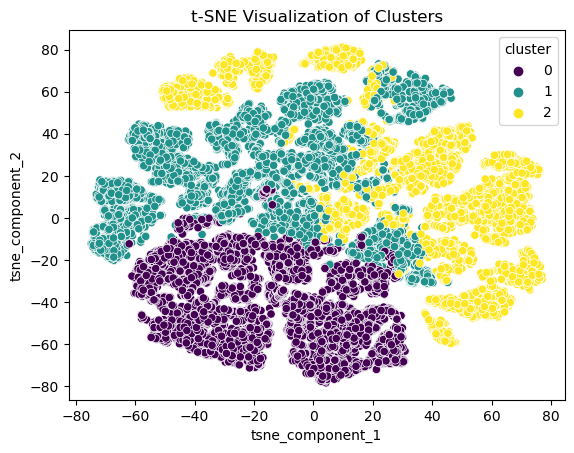

In [64]:
from sklearn.manifold import TSNE

# Assuming 'features_scaled' is your standardized feature matrix
# Assuming 'selected_df' is your DataFrame with cluster assignments from K-means

# Apply t-SNE to reduce the dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
features_tsne = tsne.fit_transform(features_scaled)

# Add the t-SNE components to your DataFrame
selected_df['tsne_component_1'] = features_tsne[:, 0]
selected_df['tsne_component_2'] = features_tsne[:, 1]

# Visualize the clustered data using t-SNE
sns.scatterplot(x='tsne_component_1', y='tsne_component_2', hue='cluster', data=selected_df, palette='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.show()